### 1. Google Play Store apps and reviews
<p>Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.</p>
<p>Let's take a look at the data, which consists of two files:</p>
<ul>
<li><code>apps.csv</code>: contains all the details of the applications on Google Play. There are 13 features that describe a given app.</li>
<li><code>user_reviews.csv</code>: contains 100 reviews for each app, <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">most helpful first</a>. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.</li>
</ul>

In [27]:
# Read in dataset
import pandas as pd

apps_with_duplicates = pd.read_csv(r"C:\Users\Admin\Desktop\apps.csv")

# Drop duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', apps['App'].count())

# Have a look at a random sample of 5 entries
n=5
apps.sample(n)


Total number of apps in the dataset =  9659


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3632,4538,R Programming Tutorial,FAMILY,NaN,5,2.8M,"1,000+",Free,0,Everyone,Education,"May 14, 2017",1.0,4.0.3 and up
759,926,SHOWTIME,ENTERTAINMENT,4.2,12398,NaN,"1,000,000+",Free,0,Teen,Entertainment,"July 2, 2018",Varies with device,Varies with device
6430,7479,FML F*ck my life + widget,FAMILY,4.2,1415,0.209,"100,000+",Free,0,Everyone,Entertainment,"May 21, 2010",3.1,1.5 and up
5698,6729,BS Calendar / Patro / पात्रो,PRODUCTIVITY,4.2,218,NaN,"50,000+",Free,0,Everyone,Productivity,"July 15, 2018",Varies with device,Varies with device
4717,5699,AV Buddy Free,FAMILY,4.1,25,47M,"5,000+",Free,0,Everyone,Education,"March 8, 2017",1.2,4.1 and up


### 2. Data Cleaning

In this section, we will concentrate on three essential features: **Installs**, **Size**, and **Price**, which will be pivotal to our analysis moving forward. A detailed examination of the dataset reveals that these columns require thorough cleaning to ensure they can be effectively utilized in subsequent code. The presence of special characters **(, $ +)** and letters **(M k)** within the **Installs**, **Size**, and **Price** columns complicates their conversion to a numerical format. To facilitate accurate analysis, we will systematically remove these extraneous elements and convert each column into the appropriate numeric data type.

In [28]:
chars_to_remove = ['+', ',', 'M', '$']
cols_to_clean = ['Installs', 'Size', 'Price']

# Loop for each column
for col in cols_to_clean:
    # Replace the characters in each column col with an empty string
    for char in chars_to_remove:
        apps[col] = apps[col].str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col])

### 3. Exploring app categories
<p>With over 1 billion active users across 190 countries, Google Play remains a vital distribution platform for reaching a global audience. For businesses looking to promote their apps effectively, enhancing visibility and discoverability on Google Play is crucial. To streamline the search experience, Google has implemented a system of categorizing apps, making it easier for users to find and engage with relevant applications. This strategic grouping not only benefits consumers but also helps developers connect with their target audiences more efficiently.</p>
<p>This leads us to the following questions:</p>
<ul>
<li>Which category holds the highest share of active apps in the market? </li>
<li>Is there a particular category that dominates the market?</li>
<li>Which categories have the smallest number of apps?</li>
</ul>
<p>We will see that there are <code>33</code> unique app categories present in our dataset. <em>Family</em> and <em>Game</em> apps have the highest market prevalence. Interestingly, <em>Tools</em>, <em>Business</em> and <em>Medical</em> apps are also at the top.</p>

In [29]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(set(apps['Category']))
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them for easier plotting
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending=False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


### 4. Distribution of app ratings
<p>Having examined the market share for each app category, we will now evaluate the average performance of these apps. App ratings, which are assessed on a scale from 1 to 5, significantly influence discoverability, conversion rates, and the overall brand image of a company. As such, ratings serve as a crucial performance indicator for any app.</p>
<p>Our research indicates that the average volume of ratings across all app categories is<code>4.17</code>. The histogram plot is skewed to the right, suggesting that most apps receive high ratings, with only a small number of exceptions among the lower-rated applications.</p>

In [30]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating'],
        xbins = {'start': 1, 'size': 0.1, 'end' : 5}
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387994


### 5. Size and price of an app
<p>Let’s now turn our attention to app size and pricing. Regarding size, excessively large mobile apps can pose challenges for users, making downloads difficult and potentially costly. Long download times may deter users before they even have the opportunity to experience the app. Additionally, the limited disk space on users’ devices further complicates matters. When it comes to pricing, many users anticipate that apps will be free or low-cost. This expectation becomes even more critical when targeting markets in developing regions, where factors such as internet speeds, income levels, and exchange rates can significantly influence user perceptions and accessibility.</p>
<p>How can we develop effective strategies for sizing and pricing our app?</p>
<ul>
<li>Does app size impact its rating?</li>
<li>Do users prefer resource-intensive apps, or do they favor lightweight alternatives? </li>
<li>Does the price of an app influence its rating? </li>
<li>Do users consistently prefer free apps to paid ones?</li>
</ul>
<p>We observe that most top-rated apps (with ratings over 4) fall within the size range of 2 MB to 20 MB. Additionally, the vast majority of apps are priced below $10.</p>

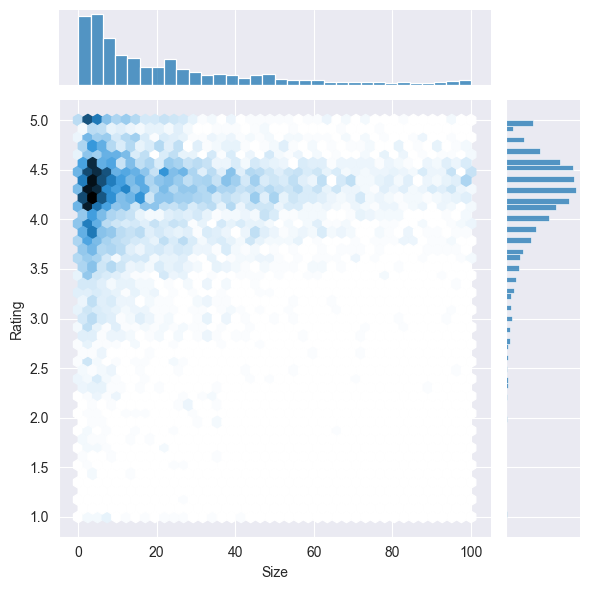

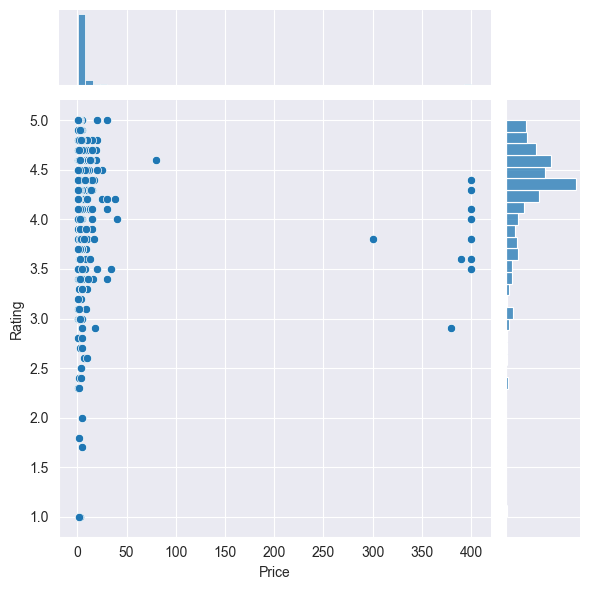

In [31]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Subset for categories with at least 250 apps
large_categories = apps.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
plt1 = sns.jointplot(x = 'Size', y = 'Rating', data = large_categories, kind = 'hex')

# Subset for paid apps only
paid_apps = apps[apps['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = 'Price', y = 'Rating', data = paid_apps)

### 6. Relation between app category and app price
<p>Now comes the challenging question: how can companies and developers ensure profitability? What monetization strategies can they implement to maximize revenue? The costs associated with apps largely depend on factors such as features, complexity, and the chosen platform.</p>
<p>When selecting the appropriate pricing strategy for your mobile app, several factors must be taken into account. One crucial consideration is the customer’s willingness to pay. An inappropriate price point could deter potential users before they even download the app. Customers may be turned off by what they perceive as excessive costs, or they might uninstall the app after being overwhelmed by ads or feeling that the value does not match the price.</p>
<p>Different app categories often necessitate varying price ranges. For instance, simple, frequently used apps like calculator applications are best offered for free. In contrast, it would be reasonable to charge for a specialized medical app designed to diagnose diabetic patients. Below, we find that <em>Medical and Family</em> apps are the most expensive. Some medical apps extend even up to \$80! All game apps are reasonably priced below \$20.</p>

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


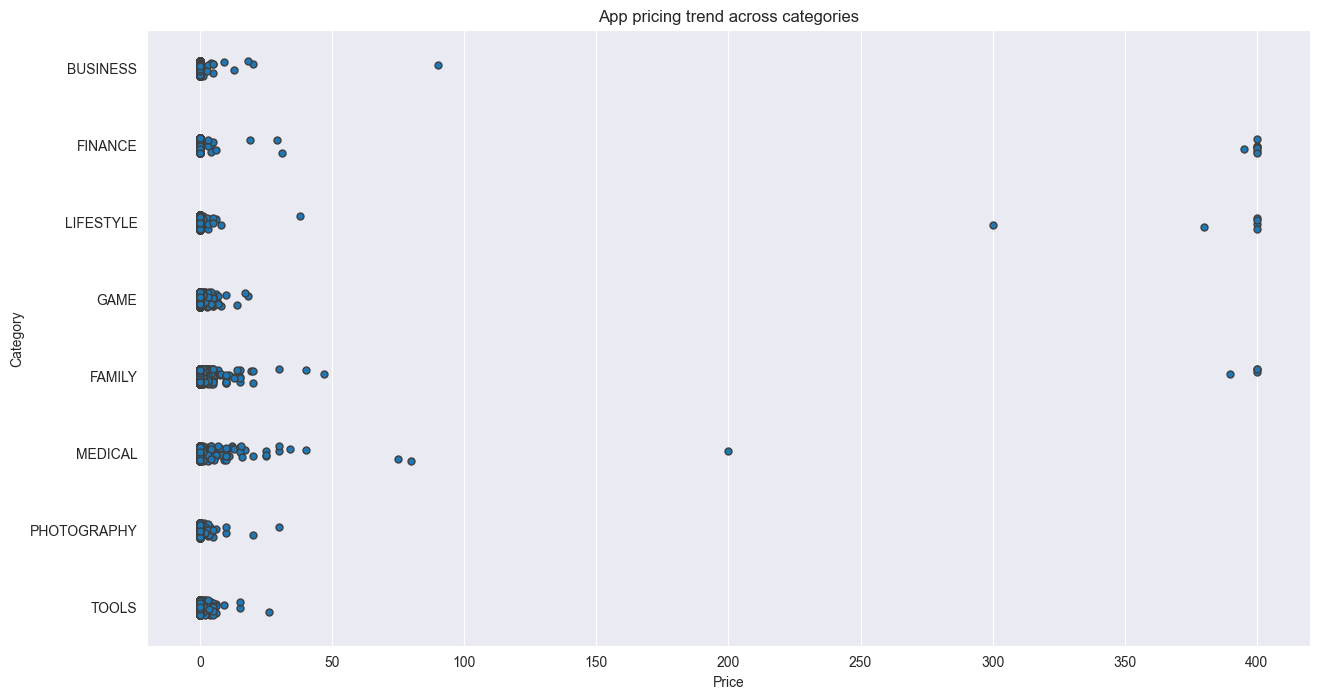

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend for the subset of categories
ax = sns.stripplot(x='Price', y='Category', data=popular_app_cats,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Category, Name and Price of apps priced above $200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

### 7. Filtering out "junk" apps
<p>It appears that many of the costly apps are what we might consider "junk" apps—those that lack a meaningful purpose. For example, a developer might create an app called <em>Ultimate Random Button</em> just for a joke or to test their app development skills. In some cases, developers may even have malicious intentions, aiming to profit by enticing users to accidentally click on a purchase in the app store.</p>
<p>Let’s filter out these junk apps and revisit our visualization. This will provide a clearer picture of the distribution of apps priced under $20.</p>

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

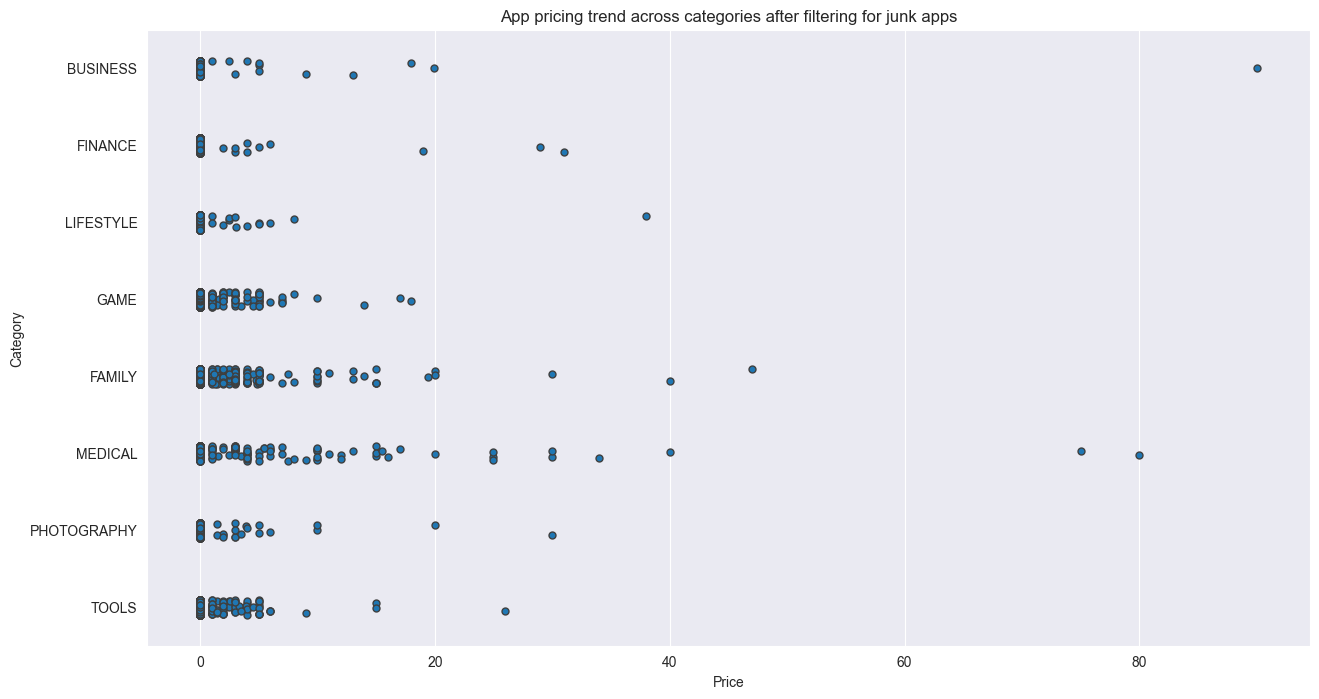

In [33]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps
ax = sns.stripplot(x='Price', y='Category', data=apps_under_100,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

### 8. Popularity of paid apps vs free apps
<p>In the current Google Play Store, there are four pricing models: free, freemium, pay and paymium. For this analysis, we will focus on free and paid apps. Here are some key characteristics of free apps:</p>
<ul>
<li>Free to download.</li>
<li>Main source of income often comes from advertisements.</li>
<li>They are often developed by companies with existing products, serving as an extension of their products.</li>
<li>Can serve as a tool for customer retention, communication, and customer service.</li>
</ul>
<p>Some characteristics of paid apps are:</p>
<ul>
<li>Users are asked to pay once for the app to download and use it.</li>
<li>The user can't really get a feel for the app before buying it.</li>
</ul>
<p>Are paid apps installed as frequently as free apps? Interestingly, while paid apps tend to have a lower number of installs compared to free apps, the difference is not as pronounced as one might expect!</p>

In [34]:
trace0 = go.Box(
    # Data for paid apps
    y=apps['Installs'][apps['Type'] == 'Paid'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps['Installs'][apps['Type'] == 'Free'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})